In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import platform
import subprocess
import json
from io import StringIO
import numpy as np
import pandas as pd
from pathlib import Path


from html_from_assignments import NMRProblem
import jsonUtils

import nmrsolution
from globals import svgDimensions

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [5]:
%matplotlib inline

In [42]:
if platform.system() == "Darwin":

    fn_json = Path("/Users/vsmw51/Downloads/4Eric/camphor_AMK/camphor_AMK_assignments_mresnova.json")
    fn_json = Path("/Users/vsmw51/Downloads/4Eric/caryophyllene/caryophyllene_assignments_mresnova.json")
    fn_json = Path("/Users/vsmw51/OneDrive - Durham University/projects/programming/2025/python/awh/bruker_data_sets/E72507_04164043_propyl_benzoate/E72507_04164043_propyl_benzoate_assignments_mresnova.json")

    # maslonic_acid
    fn_json = Path("/Users/vsmw51/Downloads/4Eric/maslinic_acid/maslinic_acid_assignments_mresnova.json")
    # salsalate
    fn_json = Path("/Users/vsmw51/Downloads/Kate/examples/salsalate/salsalate_assignments_mresnova.json")
    # camphor_amk
    fn_json = Path("/Users/vsmw51/Downloads/4Eric/camphor_AMK/camphor_AMK_assignments_mresnova.json")

elif platform.system() == "Windows":
    fn_json = Path("C:/Users/vsmw51/Downloads/4Eric/camphor_AMK/camphor_AMK_assignments_mresnova.json")
    fn_json = Path("C:/Users/vsmw51/Downloads/4Eric/caryophyllene/caryophyllene_assignments_mresnova.json")
    fn_json = Path("C:/Users/vsmw51/OneDrive - Durham University/projects/programming/2025/python/awh/bruker_data_sets/E72507_04164043_propyl_benzoate/E72507_04164043_propyl_benzoate_assignments_mresnova.json")  
    

In [43]:
with open(fn_json, 'r') as f:
    json_data = json.load(f)

In [44]:
json_data.keys()

dict_keys(['smiles', 'molfile', 'hostname', 'allAtomsInfo', 'carbonAtomsInfo', 'nmrAssignments', 'c13predictions', 'Predicted_13C_NMR_Spectrum_0', '04164754.18.ser_8', 'chosenSpectra', 'SKIP_0', 'SKIP_1', 'C13_1D_0', 'HSQC_0', 'HSQC_CLIPCOSY_0', 'SKIP_2', 'HMBC_0', 'DDEPT_CH3_ONLY_0', 'SKIP_3', 'MNOVAcalcMethod', 'exptIdentifiers', 'workingDirectory', 'workingFilename', 'simulatedAnnealing', 'ml_consent', 'spectraWithPeaks'])

In [45]:
json_data["C13_1D_0"]["peaks"]["count"]

10

In [46]:
problemdata_json = NMRProblem.from_mnova_dict(json_data)



from_mnova_dict(cls,json_data: dict):


read_in_mesrenova_json(fn: Path) -> dict:


return_nonempty_mnova_datasets(data: dict) -> dict:


create_dataframes_from_mresnova_json(data: dict) -> dict:

***** EEH ****
Processing key: smiles
k1: smiles
Processing key: molfile
k1: molfile
Processing key: hostname
k1: hostname
Skipping hostname
Processing key: allAtomsInfo
k1: allAtomsInfo
Processing key: carbonAtomsInfo
k1: carbonAtomsInfo
Processing key: nmrAssignments
k1: nmrAssignments
Processing key: c13predictions
k1: c13predictions
Processing key: chosenSpectra
k1: chosenSpectra
Processing key: SKIP_0
k1: SKIP
Skipping SKIP
Processing key: SKIP_1
k1: SKIP
Skipping SKIP
Processing key: C13_1D_0
k1: C13_1D

get_1d_dataframe_from_json C13_1D_0:

           ppm   Intensity  Type
0  219.605915    8.582668     0
1   57.664470   54.955755     0
2   46.759581   62.262457     0
3   43.273947  124.749460     0
4   43.027691   98.602029     0
5   27.032701  126.924335     0
6   29.894601  117.8056

In [47]:
problemdata_json.dataframes.keys()

dict_keys(['smiles', 'molfile', 'allAtomsInfo', 'carbonAtomsInfo', 'nmrAssignments', 'c13predictions', 'chosenSpectra', 'MNOVAcalcMethod', 'workingDirectory', 'workingFilename', 'simulatedAnnealing', 'spectraWithPeaks', 'molecule', 'C13_1D', 'HSQC', 'HSQC_CLIPCOSY', 'HMBC', 'DDEPT_CH3_ONLY', 'H1_1D', 'DEPT135', 'H1_pureshift', 'COSY', 'NOESY'])

In [48]:
problemdata_json.dataframes["HSQC_CLIPCOSY"]

,f2_ppm,f1_ppm,intensity,signaltype,Annotation
1,2.325231,43.026791,0.362336,0,
2,2.065991,43.277748,-4.606244,0,
3,2.065985,27.017430,-7.854603,0,
4,1.928359,29.898064,-15.708441,0,
5,1.927327,43.028396,-6.108494,0,
6,1.658266,27.017430,-20.051617,0,
7,1.376820,27.017430,-19.979084,0,
8,1.314888,29.898064,-23.891584,0,
9,0.952518,19.119389,9.588066,0,
10,0.933013,19.119389,566.294495,0,


In [49]:
problemdata_json.dataframes["C13_1D"]

,ppm,intensity,signaltype
1,219.605915,8.582668,0
2,57.664470,54.955755,0
3,46.759581,62.262457,0
4,43.273947,124.749460,0
5,43.027691,98.602029,0
6,29.894601,117.805662,0
7,27.032701,126.924335,0
8,19.755639,128.082401,0
9,19.123718,127.172085,0
10,9.229959,128.871609,0


In [50]:
solution = nmrsolution.NMRsolution(problemdata_json)

self.expts_available {'DDEPT_CH3_ONLY', 'HSQC', 'HMBC', 'SKIP', 'C13_1D', 'HSQC_CLIPCOSY'}
Prediction from MNOVA
Using mnova_c13predictions to calculate C13 NMR chemical shifts
n=====================================================
mnova_c13predictions Index(['atomNumber', 'atom_idx', 'numProtons', 'ppm'], dtype='object')

find the symmetry atoms in each ring and non ring group and assign the symmetry indices to each

self.hsqc_df.columns
 Index(['f2_ppm', 'f1_ppm', 'intensity', 'signaltype', 'Annotation'], dtype='object')


In [51]:
ok, msg = solution.init_class_from_json()

p0 43.27184054872683 <class 'float'>
p0 27.032843816484405 <class 'float'>
p0 29.88423328889483 <class 'float'>
init_c13_from_hsqc_and_hmbc
init_pureshift_from_h1
self.C13indexC13ppm {1: 219.6059145106165, 2: 57.66446973701751, 3: 46.759581381800146, 4: 43.27394727941863, 5: 43.02769118617828, 6: 29.894600592642416, 7: 27.032701035988502, 8: 19.755638717800558, 9: 19.123717988384183, 10: 9.229958732124508}
1
2
3
4
5
6
7
8
9
10
Assigning f1p_ppm and f1p_i to h1 dataframe based on hsqc dataframe
self.h1.:
          ppm  integral  numProtons jCouplingClass jCouplingVals label f1H_i  \
1   2.323277        -1          -1                                 H1    H1   
2   2.065440        -1          -1                                 H2    H2   
3   1.927436        -1          -1                                 H3    H3   
4   1.816411        -1          -1                                 H4    H4   
5   1.657766        -1          -1                                 H5    H5   
6   1.377486    

In [52]:
rtn_msg, rtn_num = solution.assign_CH3_CH2_CH1_overall()
rtn_msg

assign_CH3_CH2_CH1_in_HSQC_using_Assignments
c13_from_hsqc and H1_data_missing
CH1_mol_df.shape[0]: 1
num_CH3CH1_hsqc: 4
CH3CH1_hsqc_df.shape[0]: 4
CH3CH1_mol_df.shape[0]: 4
CH3CH1_sym_mol_df.shape[0]: 3
we have both CH3 and CH1 groups in the expected molecule
CH3CH1_hsqc_df_lessthan_67.shape[0]: 4
CH3CH1_hsqc_df_morethan_67.shape[0]: 0
CH3CH1_mol_df_lessthan_67.shape[0]: 4
CH3CH1_mol_df_morethan_67.shape[0]: 0
CH3CH1_hsqc_df.shape[0] == CH3CH1_mol_df.shape[0]
self.error_code 200
ok 200


'ok'

In [53]:
[problemdata_json.dataframes["H1_1D"].empty,
 problemdata_json.dataframes["C13_1D"].empty,
 problemdata_json.dataframes["HSQC"].empty,
 problemdata_json.dataframes["HMBC"].empty,
 problemdata_json.dataframes["H1_pureshift"].empty,
 problemdata_json.dataframes["HSQC_CLIPCOSY"].empty,
 problemdata_json.dataframes["DDEPT_CH3_ONLY"].empty,
 problemdata_json.dataframes["COSY"].empty,
 problemdata_json.dataframes["NOESY"].empty
 ]

[True, False, False, False, True, False, False, True, True]

In [54]:
problemdata_json.dataframes["chosenSpectra"]

,chosenSpectra,filename,expt,NMRdimensions
0,1H 1D zg 04164754.10.fid_1 SKIP,04164754.10.fid_1,SKIP,1D
1,1H 1D reset_psychetse.ptg 04164754.11.1.1r_2 SKIP,04164754.11.1.1r_2,SKIP,1D
2,13C 1D zgpg30 04164754.14.fid_3 C13_1D,04164754.14.fid_3,C13_1D,1D
3,"[13C, 1H] HSQC-EDITED hsqcedetgpsisp2.3.ptg 04...",04164754.15.ser_4,HSQC,2D
4,"[13C, 1H] HSQC hsqc_clip_cosy_mc_notation.eeh ...",04164754.18.ser_5,HSQC_CLIPCOSY,2D
5,"[1H, 1H] HSQC hsqc_clip_cosy_mc_notation.eeh 0...",04164754.18.ser_6,SKIP,2D
6,"[13C, 1H] HMBC hmbcetgpl3nd.ptg 04164754.16.se...",04164754.16.ser_9,HMBC,2D
7,"[13C, 1H] Unknown hcdeptedetgpzf 04164754.19.s...",04164754.19.ser_10,DDEPT_CH3_ONLY,2D
8,"[13C, 13C] HSQC hsqc_clip_cosy_mc_notation.eeh...",04164754.18.ser_11,SKIP,2D


In [55]:
# drop the rows with SKIP in expt column
expts_with_peaks = problemdata_json.dataframes["chosenSpectra"][~problemdata_json.dataframes["chosenSpectra"]["expt"].str.contains("SKIP")].expt.values
expts_with_peaks

array(['C13_1D', 'HSQC', 'HSQC_CLIPCOSY', 'HMBC', 'DDEPT_CH3_ONLY'],
      dtype=object)

In [56]:
def exact_ppm_values_only( problemdata_json):

    expts_with_peaks = problemdata_json.dataframes["chosenSpectra"][~problemdata_json.dataframes["chosenSpectra"]["expt"].str.contains("SKIP")].expt.values

    f2_ppm_expts = set()
    f1_ppm_expts = set()

    f1_ppm = set(problemdata_json.dataframes["C13_1D"]["ppm"].values)
    f2_ppm = set(problemdata_json.dataframes["HSQC"]["f2_ppm"].values)
    
    if 'C13_1D' in expts_with_peaks and 'HSQC' in expts_with_peaks:




        for expt in expts_with_peaks:
            if expt in ["HSQC", "HSQC_CLIPCOSY", "HMBC", "DDEPT_CH3_ONLY"]:
                # add f2_ppm values to f2_ppm_expts set
                f2_ppm_set = set(problemdata_json.dataframes[expt]["f2_ppm"].values)
                f2_ppm_expts.update(f2_ppm_set)
                
                f1_ppm_set = set(problemdata_json.dataframes[expt]["f1_ppm"].values)
                f1_ppm_expts.update(f1_ppm_set)

            elif expt in ["COSY"]:
                f2_ppm_set = set(problemdata_json.dataframes[expt]["f2_ppm"].values)
                f2_ppm_expts.update(f2_ppm_set)
                f2_ppm_set = set(problemdata_json.dataframes[expt]["f1_ppm"].values)
                f2_ppm_expts.update(f2_ppm_set)
                


        print("\nf1_ppm_expts:\n", f1_ppm_expts)
        print("\nf2_ppm_expts:\n", f2_ppm_expts)

        print("\nextra f1_ppm:\n", f1_ppm - f1_ppm_expts)
        print("\nextra f2_ppm:\n", f2_ppm - f2_ppm_expts)

        #  check if f1_ppm - f1_ppm_expts is empty
        if  len(f1_ppm - f1_ppm_expts) > 0 or len(f2_ppm - f2_ppm_expts) > 0:
            print("There are extra ppm values in f1_ppm and f2_ppm that are not in the expts_with_peaks.")
            return False
        else:
            print("All ppm values in f1_ppm and f2_ppm are accounted for in the expts_with_peaks.")
            return True
    else:
        return False
    
exact_ppm_values_only(problemdata_json)
   


f1_ppm_expts:
 {9.215895174865537, 9.208730227181578, 9.169122971846173, 9.22171389813049, 9.222970677512729, 29.880420594929546, 19.12793202021482, 19.744431888625083, 19.119389162711947, 19.09741430919636, 19.73468506114842, 19.75665991466401, 19.11243144939851, 19.745273005314733, 27.017430255939068, 27.032843816484405, 29.88423328889483, 29.89806432334628, 29.896130602409784, 26.899167282554156, 27.049213540363596, 27.013924850908253, 26.9565460667312, 27.014630611862675, 29.88501367744047, 29.919596605941386, 43.02539260901721, 43.27184054872683, 43.277747913523164, 43.026790757967845, 43.02839635152799, 43.04378041270918, 43.26212933118194, 43.01258771007022, 43.02298527761653, 46.77650716183891, 46.745314459199975, 46.74684716074904, 46.740561084279896, 57.64196524774585, 57.6731579503848, 57.654195601452145, 57.64785938006531, 57.650168056988505, 43.19974392590401, 43.03112579136919, 43.035020955029715, 219.60560893885696, 19.12443701207647, 19.758883179609647, 19.108626694909

False

In [57]:

expts_with_peaks = problemdata_json.dataframes["chosenSpectra"][~problemdata_json.dataframes["chosenSpectra"]["expt"].str.contains("SKIP")].expt.values

f2_ppm_expts = set()
f1_ppm_expts = set()

f1_ppm = set(problemdata_json.dataframes["C13_1D"]["ppm"].values)
f2_ppm = set(problemdata_json.dataframes["HSQC"]["f2_ppm"].values)

if 'C13_1D' in expts_with_peaks and 'HSQC' in expts_with_peaks:




    for expt in expts_with_peaks:
        if expt in ["HSQC", "HSQC_CLIPCOSY", "HMBC", "DDEPT_CH3_ONLY"]:
            # add f2_ppm values to f2_ppm_expts set
            f2_ppm_set = set(problemdata_json.dataframes[expt]["f2_ppm"].values)
            f2_ppm_expts.update(f2_ppm_set)
            
            f1_ppm_set = set(problemdata_json.dataframes[expt]["f1_ppm"].values)
            f1_ppm_expts.update(f1_ppm_set)

            print(f"{expt} f1_ppm: {len(f1_ppm_set - f1_ppm)}, {f1_ppm_set - f1_ppm}, f2_ppm: {len(f2_ppm_set - f2_ppm)}, {f2_ppm_set - f2_ppm}")


        elif expt in ["COSY"]:
            f2_ppm_set = set(problemdata_json.dataframes[expt]["f2_ppm"].values)
            f2_ppm_expts.update(f2_ppm_set)
            f1_ppm_set = set(problemdata_json.dataframes[expt]["f1_ppm"].values)
            f2_ppm_expts.update(f1_ppm_set)

            print(f"{expt} f1_ppm: {len(f1_ppm_set - f1_ppm)}, {f1_ppm_set - f1_ppm}, f2_ppm: {len(f2_ppm_set - f2_ppm)}, {f2_ppm_set - f2_ppm}")
            


    # print("f1_ppm_expts:", f1_ppm_expts)
    # print("f2_ppm_expts:", f2_ppm_expts)

    # print("extra f1_ppm:", f1_ppm - f1_ppm_expts)
    # print("extra f2_ppm:", f2_ppm - f2_ppm_expts)

    print("len(f1_ppm - f1_ppm_expts):", len(f1_ppm - f1_ppm_expts))
    print("len(f2_ppm - f2_ppm_expts):", len(f2_ppm - f2_ppm_expts))

    #  check if f1_ppm - f1_ppm_expts is empty
    if len(f1_ppm - f1_ppm_expts) > 0 or len(f2_ppm - f2_ppm_expts) > 0:
        print("There are extra ppm values in f1_ppm and f2_ppm that are not in the expts_with_peaks.")
        # return False
    else:
        print("All ppm values in f1_ppm and f2_ppm are accounted for in the expts_with_peaks.")
        # return True
else:
    print("C13_1D or HSQC not in expts_with_peaks")




HSQC f1_ppm: 8, {9.215895174865537, 43.02539260901721, 43.27184054872683, 29.896130602409784, 19.12793202021482, 19.744431888625083, 27.032843816484405, 29.88423328889483}, f2_ppm: 0, set()
HSQC_CLIPCOSY f1_ppm: 10, {9.208730227181578, 43.02839635152799, 43.277747913523164, 43.026790757967845, 19.119389162711947, 19.09741430919636, 19.73468506114842, 19.75665991466401, 27.017430255939068, 29.89806432334628}, f2_ppm: 15, {0.9525176191435792, 1.9283587155538588, 2.325230871260349, 2.0659911216886075, 2.0659854211644184, 1.9273265152617793, 1.6582663057931344, 1.376819692819538, 1.3148876752947867, 0.9330126166320213, 0.9124577930821922, 0.7909358562341021, 0.7866308679485298, 0.8837528600655278, 0.8091184800958352}
HMBC f1_ppm: 30, {9.169122971846173, 9.22171389813049, 19.745273005314733, 19.11243144939851, 19.12443701207647, 26.9565460667312, 27.013924850908253, 27.014630611862675, 29.919596605941386, 29.880420594929546, 26.899167282554156, 27.049213540363596, 29.88501367744047, 43.0437

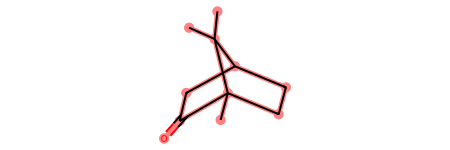

In [58]:
solution.expected_molecule

In [59]:
f1_ppm - f1_ppm_expts

{9.229958732124508,
 19.123717988384183,
 19.755638717800558,
 27.032701035988502,
 29.894600592642416,
 43.02769118617828,
 43.27394727941863,
 46.759581381800146,
 57.66446973701751,
 219.6059145106165}

In [60]:
expts_with_peaks = problemdata_json.dataframes["chosenSpectra"][~problemdata_json.dataframes["chosenSpectra"]["expt"].str.contains("SKIP")].expt.values

f2_ppm_expts = set()
f1_ppm_expts = set()

f1_ppm = set(problemdata_json.dataframes["C13_1D"]["ppm"].values)
f2_ppm = set(problemdata_json.dataframes["HSQC"]["f2_ppm"].values)

In [61]:
f1_ppm

{9.229958732124508,
 19.123717988384183,
 19.755638717800558,
 27.032701035988502,
 29.894600592642416,
 43.02769118617828,
 43.27394727941863,
 46.759581381800146,
 57.66446973701751,
 219.6059145106165}

In [62]:
f2_ppm

{0.8099812156518419,
 0.8846792038091307,
 0.9342632131894004,
 1.3147101944012127,
 1.3774858558508407,
 1.657765921759747,
 1.8164114451139637,
 1.9274360167194213,
 2.065440158984198,
 2.3232769624125433}

In [63]:
f1_ppm_set = set(problemdata_json.dataframes["HSQC"]["f1_ppm"].values)
f1_ppm_set

{9.215895174865537,
 19.12793202021482,
 19.744431888625083,
 27.032843816484405,
 29.88423328889483,
 29.896130602409784,
 43.02539260901721,
 43.27184054872683}

In [64]:
f1_ppm - f1_ppm_set

{9.229958732124508,
 19.123717988384183,
 19.755638717800558,
 27.032701035988502,
 29.894600592642416,
 43.02769118617828,
 43.27394727941863,
 46.759581381800146,
 57.66446973701751,
 219.6059145106165}